First 5 rows of the dataset:
                  Date  Sales  Profit  Discount Region
0  2021-04-13 00:00:00    228     470      0.42  South
1  2022-03-12 00:00:00    747     242      0.34   West
2  2021-09-28 00:00:00    571     268      0.37  South
3  2021-04-17 00:00:00    162     368      0.10   West
4  2021-03-13 00:00:00    238     207      0.27   East

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      100 non-null    object 
 1   Sales     100 non-null    int64  
 2   Profit    100 non-null    int64  
 3   Discount  100 non-null    float64
 4   Region    100 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB

Statistical Summary:
           Sales     Profit    Discount
count  100.00000  100.00000  100.000000
mean   577.61000  270.84000    0.263300
std    258.97287  128.11585    0.142298

,Date,Sales,Profit,Discount,Region
0,2021-04-13,228,470,0.42,South
1,2022-03-12,747,242,0.34,West
2,2021-09-28,571,268,0.37,South
3,2021-04-17,162,368,0.10,West
4,2021-03-13,238,207,0.27,East


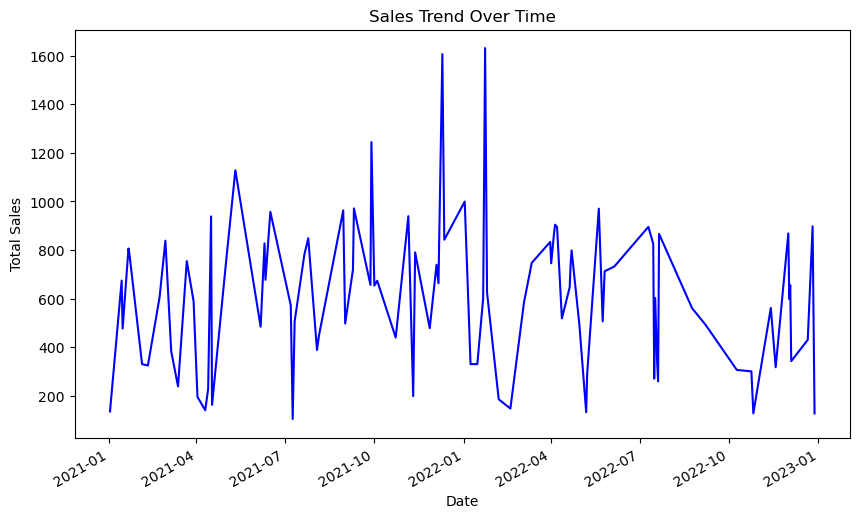

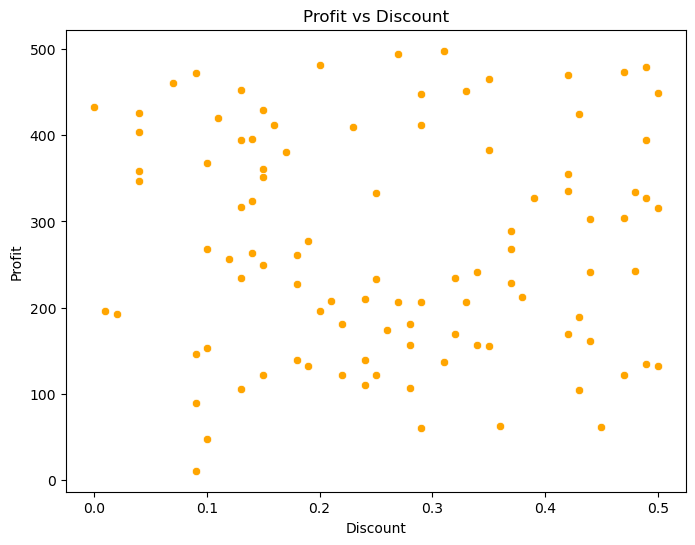

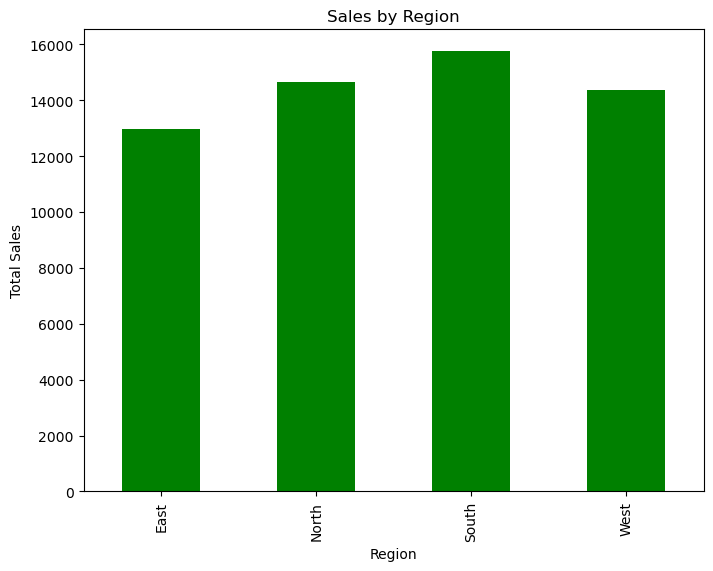

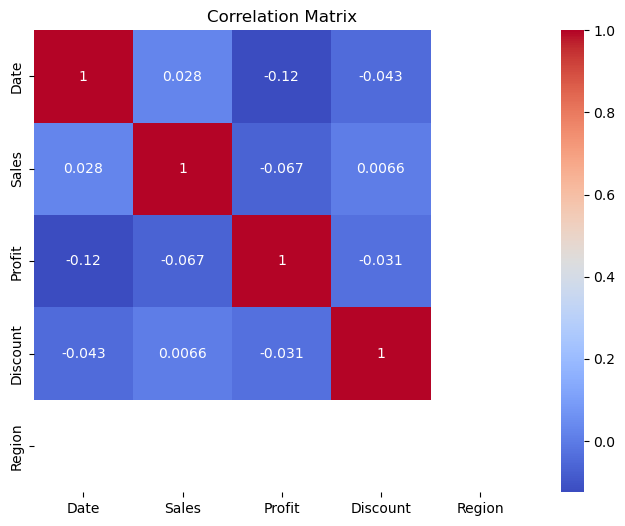

Mean Squared Error: 72680.31
R-squared Score: -0.07


In [45]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Anandhu\data science task2\sales_data.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())  # Corrected to use df

# Basic information about the dataset
print("\nDataset Information:")
df.info()  # Corrected to use df

# Statistical summary of numerical columns
print("\nStatistical Summary:")
print(df.describe())  # Corrected to use df

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
print(f"Missing values before cleaning:\n{df.isnull().sum()}")  # Corrected to use df

# Fill missing numerical values with column mean
numerical_columns = df.select_dtypes(include=['number']).columns  # Select only numerical columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Print the count of missing values after cleaning
print(f"Missing values after cleaning:\n{df.isnull().sum()}")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df ['Date'])

# Verify the changes
print("\nData after cleaning:")
display(df.head())

#Plot sales trends over time
plt.figure(figsize=(10, 6))
df.groupby('Date')['Sales'].sum().plot(kind='line', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

#Scatter plot: Profit vs Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, color='orange')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

#Sales distribution by region
plt.figure(figsize=(8, 6))
region_sales = df.groupby('Region') ['Sales'].sum()
region_sales.plot(kind='bar', color='green')
plt.title('Sales by Region')
plt.ylabel('Total Sales')
plt.show()

# Ensure data is numeric and handle missing values
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, coercing errors to NaN
df.fillna(df.mean(), inplace=True)  # Fill missing values with column means

# Heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df[['Profit', 'Discount']]
y = df['Sales']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")